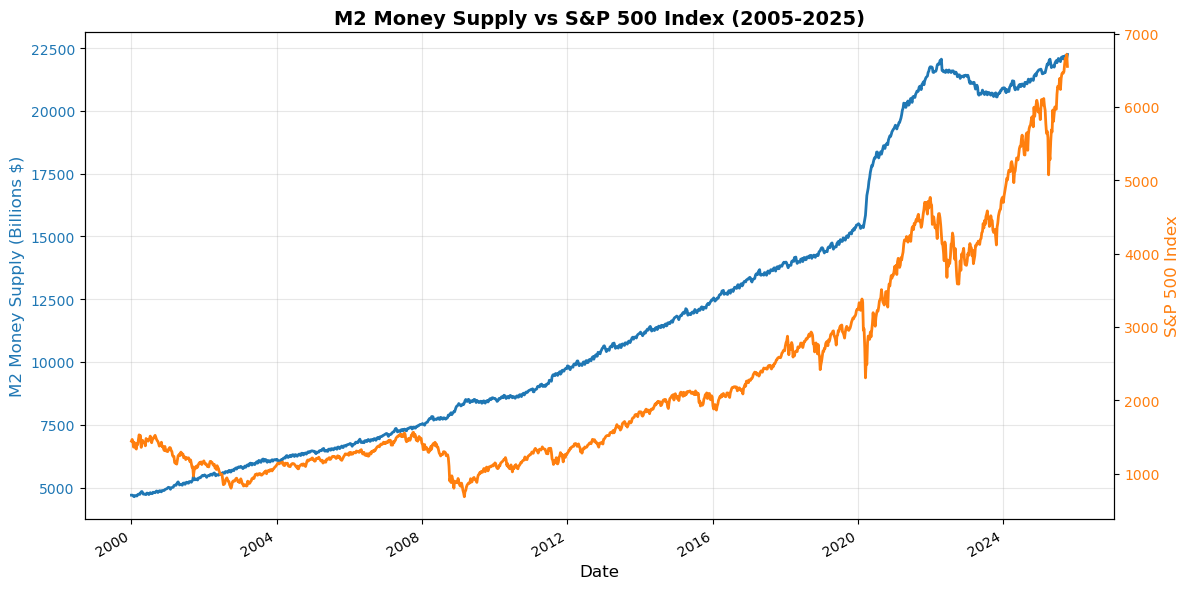

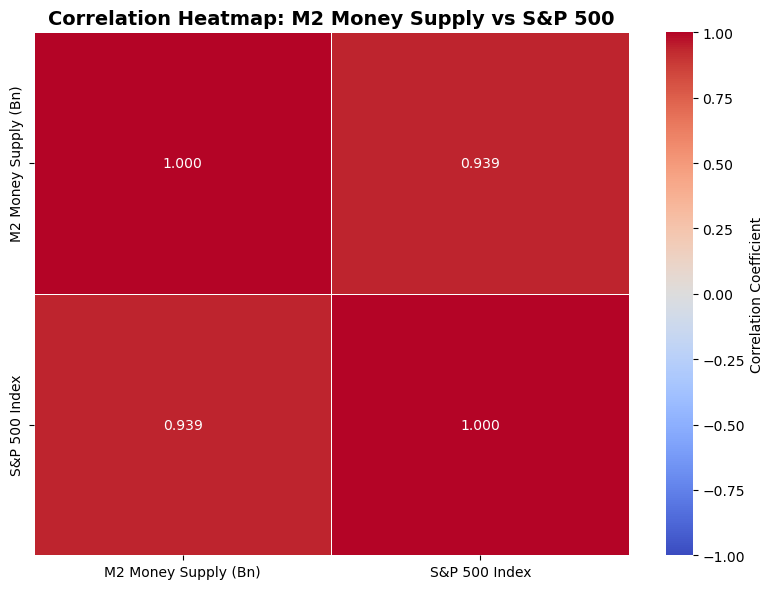

Correlation between M2 Money Supply and S&P 500: 0.9392


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('DS project M2 & Asset Prices - Group D.csv', sep=';')

# Remove the first column (unnamed) if present
df = df.iloc[:, 1:]

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

# Clean numerical data (remove $ and . and replace , with .)
df['M2 Money Supply (Bn)'] = df['M2 Money Supply (Bn)'].str.replace('$', '').str.replace('.', '').str.replace(',', '.').astype(float)
df['S&P 500 Index'] = df['S&P 500 Index'].str.replace('$', '').str.replace('.', '').str.replace(',', '.').astype(float)

# Sort by date
df = df.sort_values('Date')

# Create the time series plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# First y-axis for M2 Money Supply
color = 'tab:blue'
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('M2 Money Supply (Billions $)', color=color, fontsize=12)
ax1.plot(df['Date'], df['M2 Money Supply (Bn)'], color=color, linewidth=2, label='M2 Money Supply')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Second y-axis for S&P 500
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('S&P 500 Index', color=color, fontsize=12)
ax2.plot(df['Date'], df['S&P 500 Index'], color=color, linewidth=2, label='S&P 500')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('M2 Money Supply vs S&P 500 Index (2000-2025)', fontsize=14, fontweight='bold')

# Improve date formatting on x-axis
fig.autofmt_xdate()

plt.tight_layout()
plt.show()

# Calculate correlation matrix for M2 and S&P 500
correlation_data = df[['M2 Money Supply (Bn)', 'S&P 500 Index']].corr()

# Create correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.3f', 
            linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'},
            vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap: M2 Money Supply vs S&P 500', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print correlation coefficient
print(f"Correlation between M2 Money Supply and S&P 500: {correlation_data.iloc[0, 1]:.4f}")
